# Capítulo 8

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import scipy.stats as stats
import seaborn as sns

## Ejercicio 1

Los datos siguientes corresponden a las calificaciones obtenidas por un grupo de 20 estudiantes en un examen de ingreso a la universidad y en una prueba de comprensión verbal. Hacer un diagrama de dispersión y calcular la *r* de Pearson para estos datos.

In [106]:
datos_ej1 = pd.DataFrame({
    'Estudiante': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T'],
    'Examen de ingreso a Univ. (X)': [52, 49, 26, 28, 63, 44, 70, 32, 49, 51, 64, 28, 49, 43, 30, 65, 35, 60, 49, 66],
    'Prueba de comprensión verbal (Y)': [49, 49, 17, 34, 52, 41, 45, 32, 29, 49, 53, 17, 40, 41, 15, 50, 28, 55, 37, 50],
})
datos_ej1

,Estudiante,Examen de ingreso a Univ. (X),Prueba de comprensión verbal (Y)
0,A,52,49
1,B,49,49
2,C,26,17
3,D,28,34
4,E,63,52
5,F,44,41
6,G,70,45
7,H,32,32
8,I,49,29
9,J,51,49


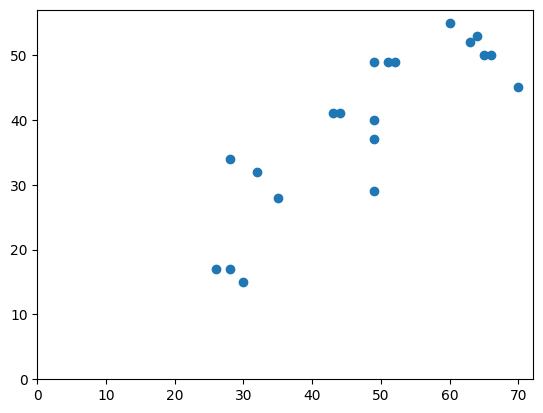

In [107]:
plt.scatter(datos_ej1['Examen de ingreso a Univ. (X)'], datos_ej1['Prueba de comprensión verbal (Y)'])
plt.ylim(bottom = 0)
plt.xlim(left = 0)
plt.show()

### Cálculo manual usando las calificaciones z

In [108]:
media_x = datos_ej1['Examen de ingreso a Univ. (X)'].mean()
media_y = datos_ej1['Prueba de comprensión verbal (Y)'].mean()

# Usamos el df para hacer una operación vectorial, restando a cada dato de cada variable su respectiva media
x_xmedia = datos_ej1['Examen de ingreso a Univ. (X)'] - media_x # El resultado es una Serie
y_ymedia = datos_ej1['Prueba de comprensión verbal (Y)'] - media_y # El resultado es una Serie


# Ahora obtenemos las calificaciones z de cada variable, usando el .pstdev() del df para sacar el desvío estándar POBLACIONAL
# Aprovechamos el objeto Series para hacer una operación vectorial
calif_z_x = x_xmedia/ statistics.pstdev(datos_ej1['Examen de ingreso a Univ. (X)']) # El resultado es una Serie
calif_z_y = y_ymedia / statistics.pstdev(datos_ej1['Prueba de comprensión verbal (Y)']) # El resultado es una Serie

# Multiplicamos cada pareja de calificaciones
z_xy = calif_z_x * calif_z_y

# Por último, obtenemos la media de estos productos (sumándolos y dividiéndolos por N) para obtener la r de Pearson
r = z_xy.mean()
print(f'r de Pearson: {r}')

r de Pearson: 0.8466227637951317


### Cálculo manual con la covarianza

In [109]:
covarianza = np.sum(x_xmedia * y_ymedia) # Es la suma de un producto vectorial. Es el producto POR ESTUDIANTE de las respectivas desviaciones a las medias.
suma_cuadrados_x = sum(x_xmedia**2)
suma_cuadrados_y = sum(y_ymedia**2)

r = covarianza /(np.sqrt(suma_cuadrados_x * suma_cuadrados_y))
r

np.float64(0.8466227637951317)

#### Más sobre la covarianza

Se puede sacar una matriz de covarianzas, en las que las celdas que corresponden a los cruces de las mismas variables expresan la varianza de cada una.
Las celdas que corresponden a cruces de distintas variables expresan la covarianza (es indistito si la variable A está en la fila y la B en la columna o viceversa)

In [110]:
matriz_covarianzas = datos_ej1[['Examen de ingreso a Univ. (X)', 'Prueba de comprensión verbal (Y)']].cov()
matriz_covarianzas

,Examen de ingreso a Univ. (X),Prueba de comprensión verbal (Y)
Examen de ingreso a Univ. (X),201.186842,152.160526
Prueba de comprensión verbal (Y),152.160526,160.555263


In [111]:
# Usamos el método .loc para aislar la celda del cruce de las variables X e Y
covarianza = matriz_covarianzas.loc['Examen de ingreso a Univ. (X)', 'Prueba de comprensión verbal (Y)']
covarianza

np.float64(152.16052631578944)

In [112]:
r = covarianza / (datos_ej1['Examen de ingreso a Univ. (X)'].std() * datos_ej1['Prueba de comprensión verbal (Y)'].std())
r

np.float64(0.8466227637951315)

¿Por qué cambia el denominador? Porque estrictamente hablando, la covarianza es la que sacamos en esta última forma de calcular la r de Pearson, la cual implica la división por N o N-1 según se trate de datos muestrales o poblacionales. Y el desvío estándar multiplica dos veces la raíz cuadrada de N o N-1 según corresponda, pudiendo entonces simplificarse con el N o N-1 del numerador; de esta forma se llega a la fórmula que presentan Runyon y Huber.

### Cálculo con Stats

In [113]:
stats.pearsonr(datos_ej1['Examen de ingreso a Univ. (X)'], datos_ej1['Prueba de comprensión verbal (Y)'])

PearsonRResult(statistic=np.float64(0.8466227637951316), pvalue=np.float64(2.5211971162007716e-06))

El concepto de p-valor (*p-value*) tiene que ver con inferencia estadística y se analiza en capítulos posteriores.

### Cálculo con Pandas

In [114]:
datos_ej1[['Examen de ingreso a Univ. (X)', 'Prueba de comprensión verbal (Y)']].corr()
# Por defecto este método saca la r de Pearson, pero se puede explicitar --> .corr('pearson')

,Examen de ingreso a Univ. (X),Prueba de comprensión verbal (Y)
Examen de ingreso a Univ. (X),1.000000,0.846623
Prueba de comprensión verbal (Y),0.846623,1.000000


## Ejercicio 2

Los datos de la tabla siguiente representan las calificaciones obtenidas por 10 estudiantes en un examen de Estadística y su promedio final. Hacer un diagrama de dispersión y calcular la r de Pearson para estos datos.

In [115]:
datos_ej2 = pd.DataFrame({
    'Nota en Estadística (X)' : [90, 85, 80, 75, 70, 70, 70, 60, 60, 50],
    'Promedio final (Y)' : [2.5, 2.0, 2.5, 2.0, 1.5, 1.0, 1.0, 0.5, 0.5, 0.5]
})
datos_ej2

,Nota en Estadística (X),Promedio final (Y)
0,90,2.5
1,85,2.0
2,80,2.5
3,75,2.0
4,70,1.5
5,70,1.0
6,70,1.0
7,60,0.5
8,60,0.5
9,50,0.5


In [116]:
datos_ej2.corr()

,Nota en Estadística (X),Promedio final (Y)
Nota en Estadística (X),1.000000,0.910975
Promedio final (Y),0.910975,1.000000


## Ejercicio 3

Un estudio psicológico implicaba la clasificación de ratas según un criterio de dominación-sumisión. Para determinar la fiabilidad de la clasificación, se tabularon los rangos dados pro dos observadores diferentes. ¿Son fiables las clasificaciones? Explique la respuesta.

In [117]:
datos_ej3 = pd.DataFrame({
    'Rango según el observador A': [12, 2, 3, 1, 4, 5, 14, 11, 6, 9, 7, 10, 15, 8 ,13, 16],
    'Rango según el observador B': [15, 1, 7, 4, 2, 3, 11, 10, 5, 9, 6, 12, 13, 8 ,14, 16]
})
datos_ej3

,Rango según el observador A,Rango según el observador B
0,12,15
1,2,1
2,3,7
3,1,4
4,4,2
5,5,3
6,14,11
7,11,10
8,6,5
9,9,9


### Cálculo manual

In [118]:
diferencia_rangos = datos_ej3['Rango según el observador A'] - datos_ej3['Rango según el observador B']
diferencia_rangos

,0
0,-3
1,1
2,-4
3,-3
4,2
5,2
6,3
7,1
8,1
9,0


In [119]:
suma_diferencias_cuadradas = sum(diferencia_rangos**2)
suma_diferencias_cuadradas

64

Nótese que, al elevar las diferencias al cuadrado, es indistinto el orden en que hagamos las restas, porque todos los resultados pasan a ser positivos:

(3-1)^2 = 4

(1-3)^2 = 4

In [120]:
r_Spearman = 1 - ((6*suma_diferencias_cuadradas)/(len(datos_ej3['Rango según el observador A'])*(len(datos_ej3['Rango según el observador A'])**2-1)))
r_Spearman

0.9058823529411765

### Cálculo con Pandas

In [121]:
datos_ej3.corr('spearman')

,Rango según el observador A,Rango según el observador B
Rango según el observador A,1.000000,0.905882
Rango según el observador B,0.905882,1.000000


### Cálculo con Stats

In [122]:
stats.spearmanr(datos_ej3['Rango según el observador A'], datos_ej3['Rango según el observador B'])

SignificanceResult(statistic=np.float64(0.9058823529411765), pvalue=np.float64(1.3635133553269899e-06))

Las calificaciones son fiables porque la correlación entre los rangos según cada observador es alta. Si la operacionalización de los indicadores no fuera fiable, cada observador hubiera dado calificaciones muy distintas entre sí.

## Ejercicio 5

En cada uno de los ejemplos presentados a continuación, identifíquese una posible fuente de error en la recopilación y/o interpretación de los resultados de un análisis de correlación.

a) La relación entre la edad y el tiempo de reacción para individuos con edades comprendidas entre los tres meses y los 65 años.

b) La correlación entre los CI y las calificaciones de los mejores estudiantes universitarios.

c) La relación entre vocabulario y velocidad de lectura entre niños de una comunidad de bajo nivel económico.

## Respuestas:

a) La relación no es lineal sino curvilínea. El tiempo de reacción decrece a medida que el individuo alcanza la adultez pero, cuando envejece, crece.

b) No hay suficiente variablidad en los datos. Deberían tomarse los CI y calificaciones de todos los estudiantes universitarios. (Rango truncado)

c) Los datos están sesgados por falta de representatividad de la población. Deberían incluirse mayor variablidad entre las unidades. (Rango truncado)

## Ejercicio 6

Para un grupo de 50 personas, la suma de los productos de las calficaciones z entre dos variables x e y es 41.3, ¿cuál es la correlación entre los variables?

In [123]:
n = 50
suma_producto_z = 41.3
correlacion = suma_producto_z/n

print('Correlación: ', round(correlacion, 4))

Correlación:  0.826


## Ejercicio 7

Las siguientes calificaciones fueron obtenidas por cinco estudiantes en dos pruebas. Convertir las calificaciones en rangos y calcular la rho de Spearman



In [124]:
datos_ej7 = pd.DataFrame({
    'Prueba X': [5, 5, 5, 5, 5],
    'Prueba Y': [1, 3, 5, 7, 9]
})
datos_ej7

,Prueba X,Prueba Y
0,5,1
1,5,3
2,5,5
3,5,7
4,5,9


### R de Pearson
#### Cálculo manual

In [125]:
media_x = 5
media_y = np.mean(datos_ej7['Prueba Y'])

x_xmedia = datos_ej7['Prueba X'] - media_x
y_ymedia = datos_ej7['Prueba Y'] - media_y

calif_z_x = x_xmedia / statistics.pvariance(datos_ej7['Prueba X'])
calif_z_y = y_ymedia / statistics.pvariance(datos_ej7['Prueba Y'])

suma_producto_z = sum(calif_z_x * calif_z_y)
r_pearson = suma_producto_z / len(datos_ej7['Prueba Y'])

print('Varianza de la variable X: ', statistics.pvariance(datos_ej7['Prueba X']), '\n')

print(f"""Calificaciones z de la variable X:
{calif_z_x}
""")

print(f"""Productos de las calificaciones z:
{calif_z_x * calif_z_y}
""")

print('r de Pearson: ', r_pearson)

Varianza de la variable X:  0 

Calificaciones z de la variable X:
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Prueba X, dtype: float64

Productos de las calificaciones z:
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
dtype: float64

r de Pearson:  nan


Nótese que como la varianza de la variable X es cero, las calificaciones z son cero y por ende también los productos de las calificaciones. En consecuencia, la r de Pearson es un valor NaN (Not a Number)

#### Cálculo con Pandas

In [126]:
datos_ej7.corr('pearson')

,Prueba X,Prueba Y
Prueba X,NaN,NaN
Prueba Y,NaN,1.0


Solo la correlación de Y con Y misma da un valor numérico dado que es la única en la que existe variabilidad en ambas variables.

### Rho de Spearman
#### Cálculo manual

In [127]:
"""Dado que todos los datos son iguales, para cada uno se le asigna como rango
 el promedio de las posiciones. El promedio entre 1, 2, 3, 4 y 5 es 3"""
rango_x = np.array([3, 3, 3, 3, 3])

"""Para la variable Y, se asigna los rangos tomando como primero el caso que
tiene la calificación más alta"""
rango_y = np.array([5, 4, 3, 2, 1])

diferencia_rangos = rango_x - rango_y
n = 5
denominador = n*(n**2 - 1)

rho_spearman = 1 - ((6*sum(diferencia_rangos**2))/denominador)
rho_spearman

np.float64(0.5)

#### Cálculo con Pandas

In [128]:
datos_ej7.corr('spearman')

,Prueba X,Prueba Y
Prueba X,NaN,NaN
Prueba Y,NaN,1.0


¿Por qué dan diferente?

Porque en el cálculo manual, se sigue un procedimiento para asignar rangos aun con empates en todos los rangos, y el resultado aritmético es correcto.

En el caso del cálculo con Pandas, existe la siguiente vuelta de tuerca: dado que todos los datos de la variable X son iguales, no se pueden asignar rangos y el coeficiente da nulo.

Pueden comprobar que el SPSS sigue la misma regla que el cálculo con Pandas.

## Ejercicio 9

Una alteración a la linealidad da lugar a un r de Pearson bajo, lo cual puede ocultar relaciones verdaderas pero no lineales entre variables.

## Ejercicio 10

Un rango (variablidad) demasiado acotado da lugar a coeficientes de correlación indebidamente bajos. Recordemos que el r de Pearson se calcula a partir de la covarianza entre las variables.

## Ejercicio 11

En el ejercicio 15 del capítulo 5, se dieron las calificaciones medias de grupos con diversos números de alumnos. ¿Cuál es la correlación entre el tamaño del grupo y las calificaciones promedio en el examen final?

In [129]:
calificaciones_medias = [72.5, 68.4, 75.0, 71.3, 70.6, 78.1]
n_grupos = [25, 40, 30, 45, 50, 20]

corr_pearson = stats.pearsonr(calificaciones_medias, n_grupos)

# Mostrar solo coeficiente de correlación
r_pearson = corr_pearson[0] # Se puede porque el objeto es iterable
print('r de Pearson :', round(float(r_pearson),  4))

r de Pearson : -0.7728


### Ejercicio 12

Los siguientes datos corresponden a las calificaiones obtenidas en un examen de ingreso a la universidad y las calificaciones promedio obtenidas en el primer semestre. ¿Cuál es la relación entre estas dos variables?

In [130]:
datos_ej12 = pd.DataFrame({
  'Exmamen de ingreso' : [440, 448, 455, 460, 473, 485, 489, 500, 512, 518, 528, 550, 582, 569, 585, 593, 620, 650, 690],
  'Notas promedio': [1.57, 1.83, 2.05, 1.14, 2.73, 1.65, 2.02, 2.98, 1.79, 2.63, 2.08, 2.15, 3.44, 3.05, 3.19, 3.42, 3.87, 3.00, 3.12]
})

datos_ej12.corr()


,Exmamen de ingreso,Notas promedio
Exmamen de ingreso,1.000000,0.761798
Notas promedio,0.761798,1.000000


## Ejercicio 14

En los ejercicios 19 y 20 del capítulo 5, presentamos datos de la presión sanguínea de siete sujetos durante las sesiones de control y de acondicionamiento.

a) Hallar la r de Pearson para estas dos medidas.

b) Transformar ambos conjuntos de datos en rangos y calcular la rho de Spearman

In [131]:
datos_ej14 = pd.DataFrame({
    'Presion control' : [139.6, 213.3, 162.3, 166.9, 157.8, 165.7, 149],
    'Presion acondicionamiento' : [136.1, 179.5, 133.1, 150.4, 141.7, 166.6, 131.7]
  })
datos_ej14

,Presion control,Presion acondicionamiento
0,139.6,136.1
1,213.3,179.5
2,162.3,133.1
3,166.9,150.4
4,157.8,141.7
5,165.7,166.6
6,149.0,131.7


In [132]:
datos_ej14.corr('pearson')

,Presion control,Presion acondicionamiento
Presion control,1.000000,0.849517
Presion acondicionamiento,0.849517,1.000000


In [133]:
datos_ej14.corr('spearman')

,Presion control,Presion acondicionamiento
Presion control,1.000000,0.785714
Presion acondicionamiento,0.785714,1.000000


El libro está mal

## Ejercicio 16

La siguiente tabla corresponde a los dividendos por acción de 37 empresas industriales y el precio por acción al cierre el 15 de febrero de 1968

a) Hallar la correalción entre el precio por acción y los dividendos.

b) Expresar los dividendos como porcentajes del coste por acción.

c) ¿Hay alguna correlación entre el porcentaje de dividendos y el precio por acción?

In [134]:
datos_ej16 = pd.DataFrame({
    'Divideos por acción': [1.30, 0.56, 0.08, 0.09, 2.00, 1.95, 1.77, 0.07, 3.61, 1.67, 0.93, 0.94, 1.68, 0.86, 0.70, 2.87, 2.14, 0.84, 2.37, 0.33, 0.36, 1.57, 3.04, 1.15, 0.68, 0.73, 0.69, 0.16, 0.88, 1.22, 1.47, 1.60, 3.67, 0.35, 3.86, 1.59, 1.05],
    'Precio por acción': [34, 23, 7, 6, 48, 22, 28, 20, 46, 22, 21, 14, 27, 41, 19, 41, 37, 28, 29, 15, 14, 40, 30, 8, 44, 11, 34, 35, 17, 16, 42, 40, 50, 18, 45, 34, 12]
})
datos_ej16

,Divideos por acción,Precio por acción
0,1.30,34
1,0.56,23
2,0.08,7
3,0.09,6
4,2.00,48
5,1.95,22
6,1.77,28
7,0.07,20
8,3.61,46
9,1.67,22


In [135]:
datos_ej16.corr('pearson')

,Divideos por acción,Precio por acción
Divideos por acción,1.000000,0.632819
Precio por acción,0.632819,1.000000


In [136]:
datos_ej16['Div% coste acción'] = (datos_ej16['Divideos por acción'] / datos_ej16['Precio por acción']) *100
datos_ej16

,Divideos por acción,Precio por acción,Div% coste acción
0,1.30,34,3.823529
1,0.56,23,2.434783
2,0.08,7,1.142857
3,0.09,6,1.500000
4,2.00,48,4.166667
5,1.95,22,8.863636
6,1.77,28,6.321429
7,0.07,20,0.350000
8,3.61,46,7.847826
9,1.67,22,7.590909


In [137]:
datos_ej16[['Precio por acción', 'Div% coste acción']].corr('pearson')


,Precio por acción,Div% coste acción
Precio por acción,1.00000,-0.03579
Div% coste acción,-0.03579,1.00000


## Ejercicio 18

Supóngase que se desea estudiar la relación entre la eficacia en economía de trabajo de ciertas máquinas que posee un fabricante y el precio promedio de los cinturones de cuero que con ellas se produce. A causa de la dificultad para ordenar la calidad de las máquinas en una escala de razones, se las ordena por rangos en una escala ordinal, de modo que el rango 15 corrsponde a la mejor máquina. La relación de precios y tipos de máquinas resulta ser la siguiente:

In [138]:
datos_ej18 = pd.DataFrame({
    'Rangos': [15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1],
    'Precios': [3.50, 3.75, 3.50, 4.00, 3.95, 4.25, 4.50, 4.45, 4.75, 5.00, 4.95, 5.50, 5.75, 5.45, 6.00]
})
datos_ej18

,Rangos,Precios
0,15,3.50
1,14,3.75
2,13,3.50
3,12,4.00
4,11,3.95
5,10,4.25
6,9,4.50
7,8,4.45
8,7,4.75
9,6,5.00


Determinar la Rho de Spearman entre la calidad de las máquinas y el precio.

In [139]:
datos_ej18.corr('spearman')

,Rangos,Precios
Rangos,1.000000,-0.972297
Precios,-0.972297,1.000000


## Ejercicio 19

El propietario de una tienda registra el número de veces que los clientes solicitan o compran un artículo determinado. A esto le llama la demanda. Cada mes tiene a la venta 15 artículos. El propietario registra además el precio del artículo cada mes.

a) Determinar la relación entre la demanda y el precio, utilizando la r de Pearson.

b) Determinar la relación entre la demanda y el precio, utilizando la Rho de Spearman.

In [140]:
datos_ej19 = pd.DataFrame({
    'Mes' : ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'],
    'Demanda' : [25, 10, 12, 18, 11, 20, 13, 19, 18, 16, 15, 15],
    'Precio' : [0.5, 0.9, 0.8, 0.75, 0.85, 0.7, 0.8, 0.7, 0.72, 0.74, 0.75, 0.75]
})
datos_ej19.set_index('Mes', inplace = True)
datos_ej19

,Demanda,Precio
Mes,,
Enero,25,0.50
Febrero,10,0.90
Marzo,12,0.80
Abril,18,0.75
Mayo,11,0.85
Junio,20,0.70
Julio,13,0.80
Agosto,19,0.70
Septiembre,18,0.72


In [141]:
datos_ej19.corr('pearson')

,Demanda,Precio
Demanda,1.000000,-0.953637
Precio,-0.953637,1.000000


In [142]:
datos_ej19['Rangos'] = datos_ej19['Demanda'].rank()
datos_ej19

,Demanda,Precio,Rangos
Mes,,,
Enero,25,0.50,12.0
Febrero,10,0.90,1.0
Marzo,12,0.80,3.0
Abril,18,0.75,8.5
Mayo,11,0.85,2.0
Junio,20,0.70,11.0
Julio,13,0.80,4.0
Agosto,19,0.70,10.0
Septiembre,18,0.72,8.5


In [143]:
datos_ej19[['Demanda', 'Precio']].corr('spearman')

,Demanda,Precio
Demanda,1.000000,-0.968109
Precio,-0.968109,1.000000


In [144]:
datos_ej19[['Rangos', 'Precio']].corr('spearman')

,Rangos,Precio
Rangos,1.000000,-0.968109
Precio,-0.968109,1.000000


## Ejercicio 24

In [145]:
datos_ej24a = pd.DataFrame({
    'X' : [1.5, 1.0, 1.0, 1.5, 1.5, 2.0, 2.5, 2.5, 3.0, 3.0, 3.5, 3.5, 4.0, 4.0, 4.5, 5.0],
    'Y' : [0.5, 0.5, 2.0, 1.5, 2.0, 2.0, 2.5, 3.2, 2.5, 3.5, 3.5, 4.5, 3.5, 4.5, 4.5, 5.0]
})
datos_ej24a

,X,Y
0,1.5,0.5
1,1.0,0.5
2,1.0,2.0
3,1.5,1.5
4,1.5,2.0
5,2.0,2.0
6,2.5,2.5
7,2.5,3.2
8,3.0,2.5
9,3.0,3.5


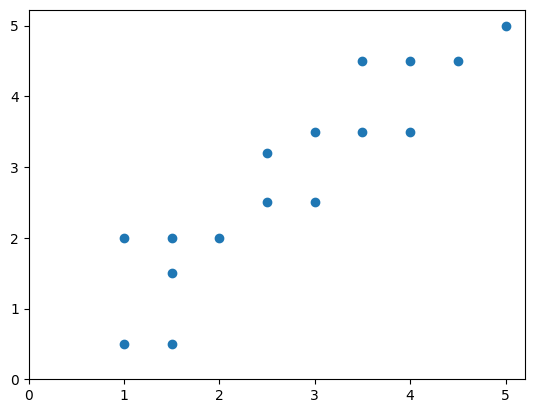

In [146]:
plt.scatter(datos_ej24a['X'], datos_ej24a['Y'])
plt.ylim(bottom = 0)
plt.xlim(left = 0)
plt.show()

In [147]:
datos_ej24b = pd.DataFrame({
    'X' : [0.5, 0.5, 1.0, 1.5, 1.5, 2.0, 2.5, 2.5, 3.0, 3.0, 3.5, 3.5, 4.0, 4.0, 5.0],
    'Y' : [5.0, 4.5, 3.5, 4.0, 2.5, 3.0, 2.0, 3.5, 2.5, 2.0, 2.0, 2.5, 1.5, 0.7, 0.5]
})
datos_ej24b

,X,Y
0,0.5,5.0
1,0.5,4.5
2,1.0,3.5
3,1.5,4.0
4,1.5,2.5
5,2.0,3.0
6,2.5,2.0
7,2.5,3.5
8,3.0,2.5
9,3.0,2.0


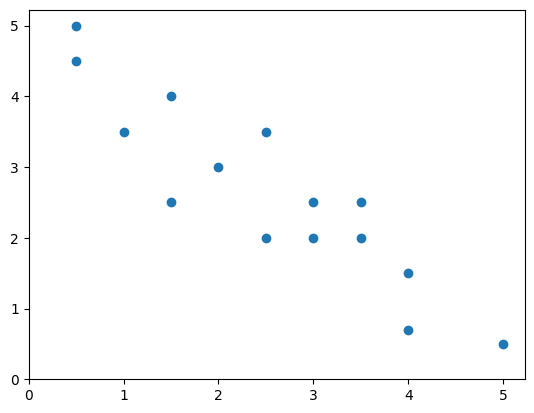

In [148]:
plt.scatter(datos_ej24b['X'], datos_ej24b['Y'])
plt.ylim(bottom = 0)
plt.xlim(left = 0)
plt.show()

In [149]:
datos_ej24c = pd.DataFrame({
    'X' : [0.5, 1.0, 1.0, 1.5, 1.5, 2.0, 2.0, 2.5, 3.0, 3.5, 3.5, 3.5, 4.0, 4.0, 4.5, 5.0, 5.0],
    'Y' : [0.5, 1.0, 1.5, 2.5, 3.5, 2.5, 3.5, 4.5, 3.5, 3.0, 2.5, 2.0, 2.5, 2.0, 1.0, 1.0, 0.5]
})
datos_ej24c

,X,Y
0,0.5,0.5
1,1.0,1.0
2,1.0,1.5
3,1.5,2.5
4,1.5,3.5
5,2.0,2.5
6,2.0,3.5
7,2.5,4.5
8,3.0,3.5
9,3.5,3.0


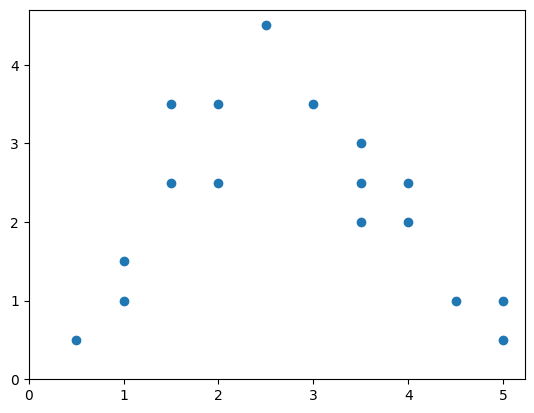

In [150]:
plt.scatter(datos_ej24c['X'], datos_ej24c['Y'])
plt.ylim(bottom = 0)
plt.xlim(left = 0)
plt.show()

In [151]:
datos_ej24d = pd.DataFrame({
    'X' : [0.5, 0.5, 0.5, 1.0, 1.5, 1.5, 1.5, 2.0, 3.0, 3.0, 3.0, 3.5, 3.5, 3.5, 4.0, 4.0, 4.5, 4.5],
    'Y' : [1.0, 2.5, 4.5, 3.5, 1.0, 2.5, 4.0, 1.0, 2.0, 3.5, 4.5, 1.0, 1.0, 3.5, 3.5, 4.5, 2.5, 1.0]
})
datos_ej24d

,X,Y
0,0.5,1.0
1,0.5,2.5
2,0.5,4.5
3,1.0,3.5
4,1.5,1.0
5,1.5,2.5
6,1.5,4.0
7,2.0,1.0
8,3.0,2.0
9,3.0,3.5


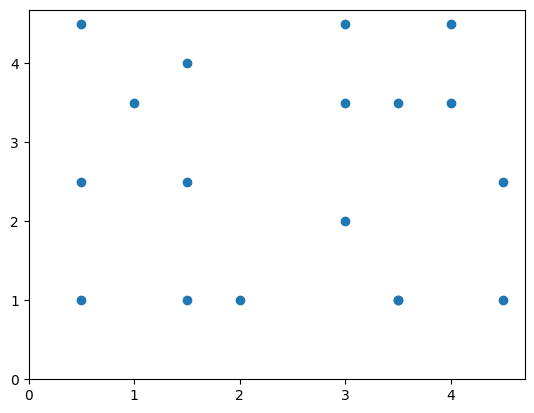

In [152]:
plt.scatter(datos_ej24d['X'], datos_ej24d['Y'])
plt.ylim(bottom = 0)
plt.xlim(left = 0)
plt.show()

## Ejercicio 25

Examinar los diagramas de dispersión del problema anterior y determinar cuál representa:

a) Una relación curvilínea entre X e Y.

b) Una correlación positiva entre X e Y.

c) Una correlación baja o nula entre X e Y.

d) Una correlación negativa entre X e Y.

### Respuestas

a) Conjunto de datos C

b) Conjunto de datos A

c) Conjunto de datos D

d) Conjunto de datos B